# Welcome to the MLB Playoff Win Predictor
Let\'s see what is the most impactful single factor to a team in winning games in the postseason of Baseball

## Abstract
I will viewing at a number of telling statistics and trying to find one that has a strong correlation to playoff wins. While fully explaining the importance of these single statistics for the team and how they might contribute to a team's success in the playoffs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
batting24 = pd.read_csv("Data/Batting24.csv")
fielding24 = pd.read_csv("Data/Fielding24.csv")
relief24 = pd.read_csv("Data/Relief24.csv")
salaries24 = pd.read_csv("Data/Salaries24.csv")
starting24 = pd.read_csv("Data/Starting24.csv")
batting24 = batting24.rename(columns = {'Tm':'Team'})
fielding24 = fielding24.rename(columns = {'Tm':'Team'})
relief24 = relief24.rename(columns = {'TEAM':'Team'})
starting24 = starting24.rename(columns = {'TEAM':'Team'})

def standarize_teams(team):
    return team[team.index('\n')+1:]
def standarize_money(money):
    return int(money[1:].replace(',', ""))
relief24['Team'] = relief24['Team'].apply(standarize_teams)
starting24['Team'] = starting24['Team'].apply(standarize_teams)

fielding24 = fielding24[['Team', 'Rtot', 'Rdrs' ]]
batting24 = batting24[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting24 = starting24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief24 = relief24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries24 = salaries24[['Team', 'Total PayrollAllocations']].rename(columns = {'Total PayrollAllocations' : 'Team Salary'})

salaries24["Team Salary"] = salaries24["Team Salary"][1:].apply(standarize_money)

salaries24 = salaries24.dropna()
def mergetopia(dfs):
    totalmerge = dfs[0]
    for i in range(1, len(dfs)):
        totalmerge = pd.merge(totalmerge, dfs[i])
    return totalmerge
Team_Data24 = mergetopia([fielding24, batting24, starting24, relief24, salaries24])
Team_Data24.columns



Index(['Team', 'Rtot', 'Rdrs', 'BatAge', 'R/G', 'HR', 'OPS', 'R', 'H', '2B',
       '3B', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Starting WHIP', 'Starting ERA',
       'Relief WHIP', 'Relief ERA', 'Team Salary'],
      dtype='object')

Now we have completeley merged the 5 csv files that I gathers earlier into one Clean Dataset with all the teams in 2024 and their team statistics that I see as valuable variables that could contribute to a team winning more playoff wins. Now we have to merge a columns of playoffs wins that each of these teams had and see how these statistics measure up.

In [ ]:
baseball_terms = {
    'Rtot': 'Total Zone',
    'Rdrs': 'Defensive Runs Saved',
    'BatAge': 'Average Age of Batters',
    'R/G': 'Runs per Game',
    'HR': 'Home Runs',
    'OPS': 'On-base Plus Slugging',
    'R': 'Runs',
    'H': 'Hits',
    '2B': 'Doubles',
    '3B': 'Triples',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Bases',
    'CS': 'Caught Stealing',
    'BB': 'Walks',
    'SO': 'Strikeouts',
    'BA': 'Batting Average',
    'OBP': 'On-base Percentage',
    'SLG': 'Slugging Percentage',
    'OPS+': 'Adjusted On-base Plus Slugging',
    'TB': 'Total Bases',
    'GDP': 'Ground into Double Plays',
    'HBP': 'Hit by Pitch',
    'SH': 'Bunts',
    'SF': 'Sacrifice Flies',
    'IBB': 'Intentional Base on Balls',
    'LOB': 'Left on Base'
}
playoff_wins24 = pd.DataFrame({
    'Team' : ["Detroit Tigers", "Houston Astros", "Kansas City Royals",
    "Baltimore Orioles", "Cleveland Guardians", "New York Yankees",
    "New York Mets", "Philadelphia Phillies", "Milwaukee Brewers", 
    "San Diego Padres", "Atlanta Braves", "Los Angeles Dodgers"], 
    "Playoff Wins" : [4, 0, 2, 0, 3, 8, 7, 1, 1, 4, 0, 11]
})
postseason_data24 = pd.merge(playoff_wins24, Team_Data24).rename(columns = baseball_terms)
cols = postseason_data24.columns
corrval24 = []
stats24 =  []
strength_corr24 = []
for i in range(2, len(cols)):
    correl = postseason_data24['Playoff Wins'].corr(postseason_data24[cols[i]])
    corrval24.append(correl)
    stats24.append(cols[i])
    if (correl >= 0.8):
        strength_corr24.append('Very Strong Positive')
    elif (correl >= 0.6):
        strength_corr24.append('Fairly Strong Positive')
    elif (correl >= 0.4):
        strength_corr24.append('Moderate Positive')
    elif (correl >= 0.2):
        strength_corr24.append('Weak Positive')
    elif (correl >= 0):
        strength_corr24.append('Very Weak Positive')
    elif (correl >= -0.2):
        strength_corr24.append('Very Weak Negative')
    elif (correl >= -0.4):
        strength_corr24.append('Weak Negative')
    elif (correl >= -0.6):
        strength_corr24.append('Moderate Negative')
    elif (correl >= -0.8):
        strength_corr24.append('Fairly Strong Negative')
    elif (correl >= -1):
        strength_corr24.append('Very Strong Negative')

Correlations24 = pd.DataFrame({"Statistic" : stats24, "Correlations": corrval24, "Strength":strength_corr24})
Correlations24 = Correlations24.sort_values(by = 'Correlations', ascending = False)
Correlations24

                     Team  Playoff Wins  Total Zone  Defensive Runs Saved  \
0          Detroit Tigers             4          38                    50   
1          Houston Astros             0          39                     1   
2      Kansas City Royals             2          10                    47   
3       Baltimore Orioles             0         -21                     1   
4     Cleveland Guardians             3          37                    89   
5        New York Yankees             8           4                    31   
6           New York Mets             7           0                    18   
7   Philadelphia Phillies             1         -17                     3   
8       Milwaukee Brewers             1          48                    64   
9        San Diego Padres             4         -37                    -8   
10         Atlanta Braves             0          10                    35   
11    Los Angeles Dodgers            11          10                    66   

,Statistic,Correlations,Strength
13,Walks,0.581575,Moderate Positive
10,Runs Batted In,0.548038,Moderate Positive
6,Runs,0.533087,Moderate Positive
3,Runs per Game,0.528850,Moderate Positive
16,On-base Percentage,0.473192,Moderate Positive
30,Team Salary,0.465693,Moderate Positive
5,On-base Plus Slugging,0.412934,Moderate Positive
27,Starting ERA,0.412177,Moderate Positive
2,Average Age of Batters,0.411147,Moderate Positive
18,Adjusted On-base Plus Slugging,0.408713,Moderate Positive


## 3 Strongest Correlations + 3 Weakest Correlations with Playoff Wins 

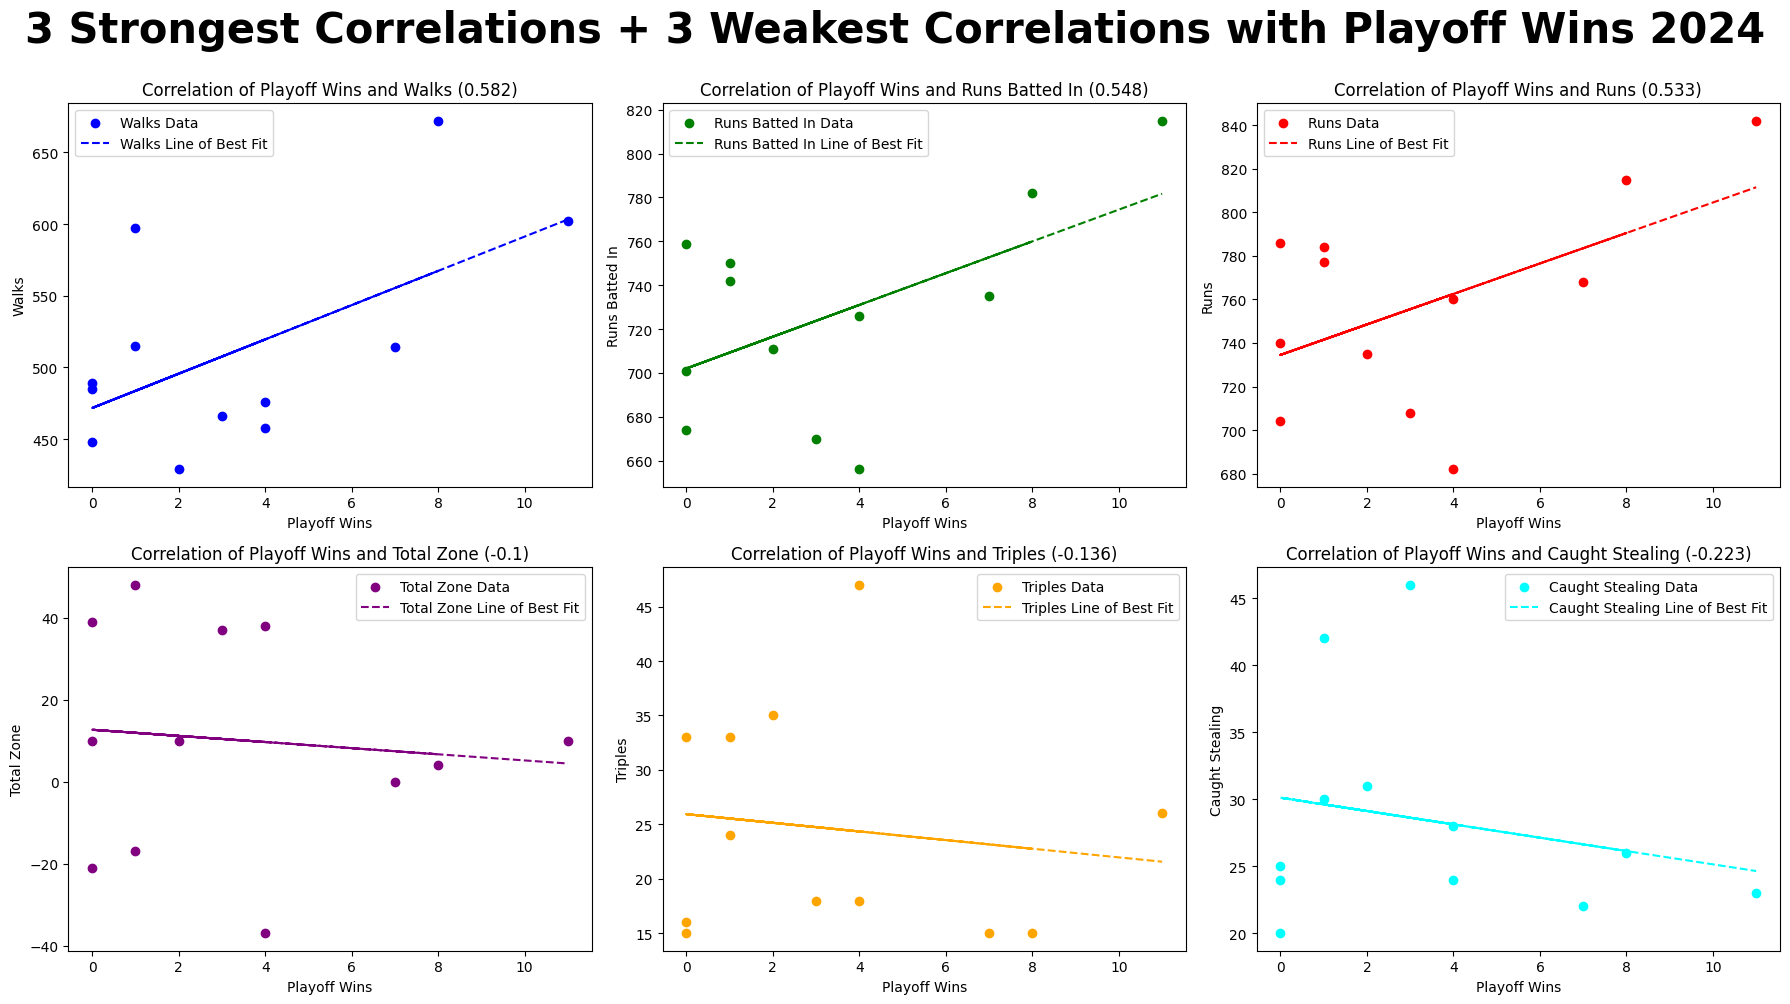

In [30]:
important24 = pd.concat([Correlations24.iloc[:3], Correlations24.iloc[-3:]]).set_index('Statistic')
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
fig.suptitle('3 Strongest Correlations + 3 Weakest Correlations with Playoff Wins 2024', fontsize=30, fontweight='bold', y=1)
for i, (index, row) in enumerate(important24.iterrows()):
    a, b = np.polyfit(postseason_data24['Playoff Wins'], postseason_data24[index], 1)
    axes[i].scatter(postseason_data24['Playoff Wins'], postseason_data24[index], color=colors[i], label=f'{index} Data')
    axes[i].plot(postseason_data24['Playoff Wins'], a * postseason_data24['Playoff Wins'] + b, color=colors[i], linestyle='--', label=f'{index} Line of Best Fit')
    axes[i].set_xlabel('Playoff Wins')
    axes[i].set_ylabel(index)
    axes[i].set_title(f"Correlation of Playoff Wins and {index} ({round(row['Correlations'], 3)})")
    axes[i].legend()
plt.tight_layout()
plt.show()